i. How does an SVR work? 

Support Vector Regression predicts continuous outcomes by fitting a hyperplane within an acceptable margin, penalizing errors only beyond that boundary. It uses kernel functions to transform data into higher dimensions, enabling it to capture nonlinear relationships.

ii. How is this similar to or different from linear regression? What do 
the different kernel types between linear, polynomial, and radial 
basis function (RBF) do? 

SVR resembles linear regression by predicting continuous values but differs by penalizing only errors exceeding a certain margin, rather than all deviations. Kernels distinguish SVR from linear regression: linear kernels model straightforward linear trends, polynomial kernels capture complex interactions, and radial basis function kernels handle intricate nonlinear patterns through similarity measures.

iii. For each kernel, what happens when you increase or decrease the 
magnitudes of hyperparameters C and gamma? Why? Justify with 
plots. 

Linear Kernel: 
The C parameter in linear kernels controls the trade-off between fitting the training data and maintaining a large margin. Increasing C reduces regularization, allowing the model to fit training data more closely but risking overfitting. Lower C values enforce more regularization, creating smoother decision boundaries that may underfit the data. Linear kernels are not affected by the gamma parameter.

RBF Kernel:
The C parameter in RBF kernels functions similarly to linear kernels, balancing fit versus regularization. The gamma parameter controls the influence radius of each training example. Lower gamma values create smoother decision boundaries as each example affects a wider area, potentially causing underfitting. Higher gamma values restrict each example's influence to nearby points, creating more complex boundaries that closely follow training data and may overfit. RBF kernels show the most dramatic performance changes with gamma variations.

Polynomial Kernel:
For polynomial kernels, C similarly balances fitting versus regularization. The gamma parameter influences the curvature and complexity of the decision boundary. Higher gamma values create more curved, complex boundaries that may overfit the data. Polynomial kernels generally show less sensitivity to extreme gamma values compared to RBF kernels.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [19]:
df = pd.read_csv("Top_spotify_songs.csv")
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", 
           "instrumentalness", "liveness", "valence", "tempo"]
target = "popularity"

df_sample = df.sample(n=1000, random_state=42)
X = df_sample[features]
y = df_sample[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

c_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]
linear_train_mse = []
linear_val_mse = []

for c in c_values:
    svr = LinearSVR(C=c, max_iter=10000, random_state=42)
    svr.fit(X_train_scaled, y_train)
    
    train_pred = svr.predict(X_train_scaled)
    val_pred = svr.predict(X_val_scaled)
    
    linear_train_mse.append(mean_squared_error(y_train, train_pred))
    linear_val_mse.append(mean_squared_error(y_val, val_pred))

def evaluate_svr(kernel, C, gamma=None):
    if gamma:
        svr = SVR(kernel=kernel, C=C, gamma=gamma)
    else:
        svr = SVR(kernel=kernel, C=C)
    
    svr.fit(X_train_scaled, y_train)
    train_pred = svr.predict(X_train_scaled)
    val_pred = svr.predict(X_val_scaled)
    
    train_mse = mean_squared_error(y_train, train_pred)
    val_mse = mean_squared_error(y_val, val_pred)
    
    return train_mse, val_mse

rbf_c_results = [evaluate_svr('rbf', c, 0.1) for c in c_values]
rbf_c_train_mse, rbf_c_val_mse = zip(*rbf_c_results)

rbf_gamma_results = [evaluate_svr('rbf', 1, g) for g in gamma_values]
rbf_gamma_train_mse, rbf_gamma_val_mse = zip(*rbf_gamma_results)

poly_c_results = [evaluate_svr('poly', c, 0.1) for c in c_values]
poly_c_train_mse, poly_c_val_mse = zip(*poly_c_results)

poly_gamma_results = [evaluate_svr('poly', 1, g) for g in gamma_values]
poly_gamma_train_mse, poly_gamma_val_mse = zip(*poly_gamma_results)

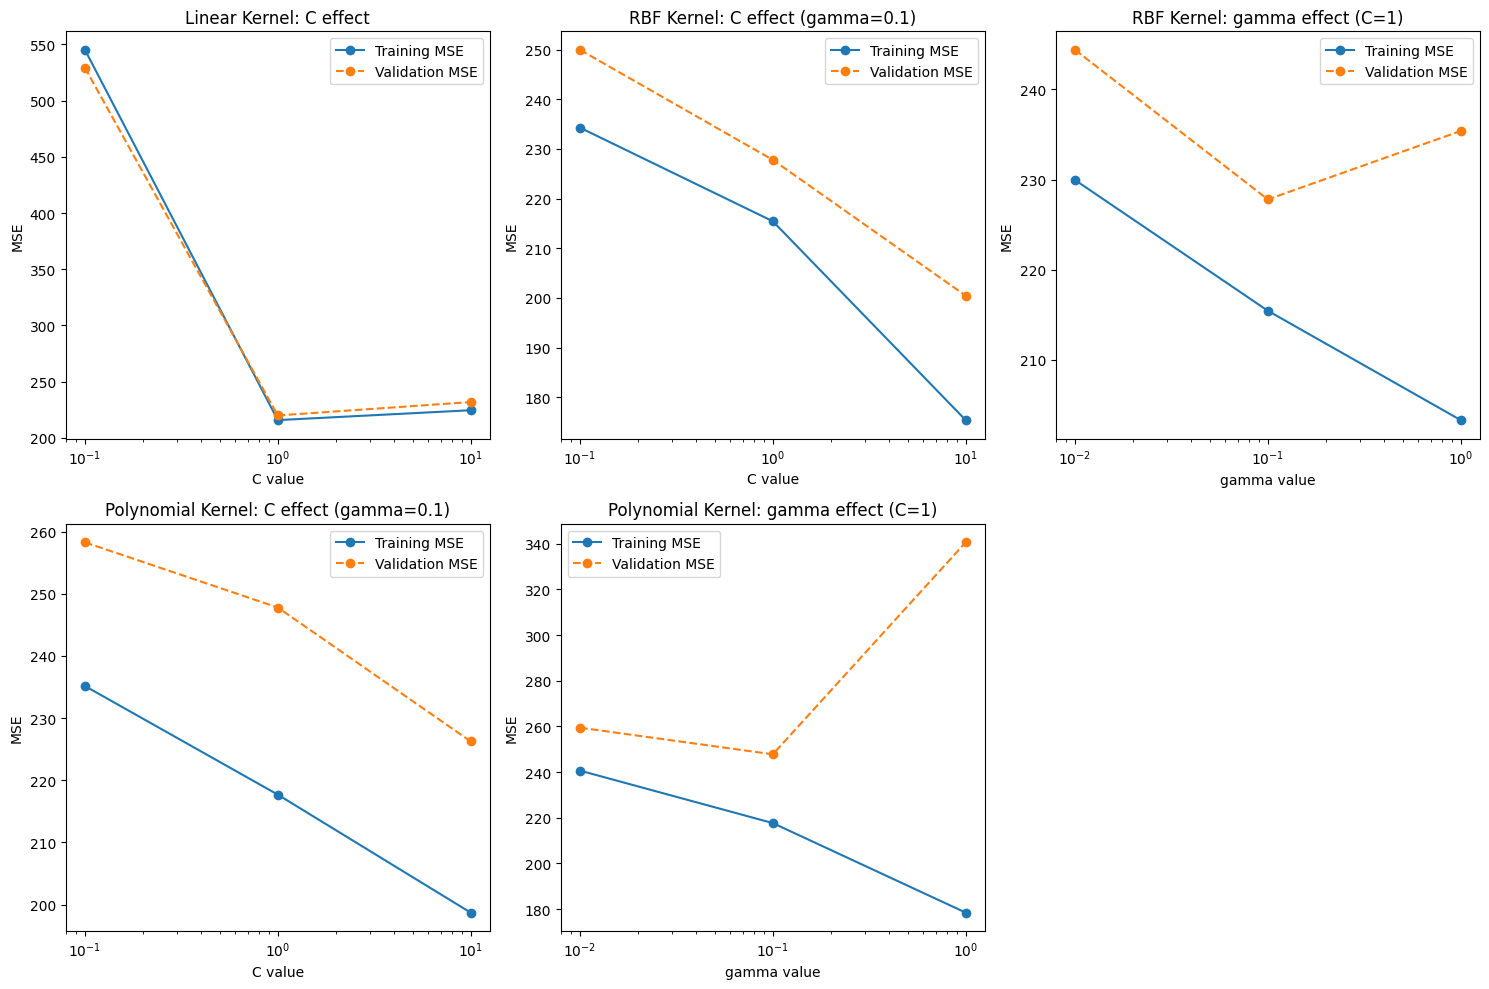

In [20]:
plt.figure(figsize=(15, 10))

# Linear Kernel - C effect
plt.subplot(2, 3, 1)
plt.plot(c_values, linear_train_mse, 'o-', label='Training MSE')
plt.plot(c_values, linear_val_mse, 'o--', label='Validation MSE')
plt.xscale('log')
plt.title('Linear Kernel: C effect')
plt.xlabel('C value')
plt.ylabel('MSE')
plt.legend()

# RBF Kernel - C effect
plt.subplot(2, 3, 2)
plt.plot(c_values, rbf_c_train_mse, 'o-', label='Training MSE')
plt.plot(c_values, rbf_c_val_mse, 'o--', label='Validation MSE')
plt.xscale('log')
plt.title('RBF Kernel: C effect (gamma=0.1)')
plt.xlabel('C value')
plt.ylabel('MSE')
plt.legend()

# RBF Kernel - gamma effect
plt.subplot(2, 3, 3)
plt.plot(gamma_values, rbf_gamma_train_mse, 'o-', label='Training MSE')
plt.plot(gamma_values, rbf_gamma_val_mse, 'o--', label='Validation MSE')
plt.xscale('log')
plt.title('RBF Kernel: gamma effect (C=1)')
plt.xlabel('gamma value')
plt.ylabel('MSE')
plt.legend()

# Poly Kernel - C effect
plt.subplot(2, 3, 4)
plt.plot(c_values, poly_c_train_mse, 'o-', label='Training MSE')
plt.plot(c_values, poly_c_val_mse, 'o--', label='Validation MSE')
plt.xscale('log')
plt.title('Polynomial Kernel: C effect (gamma=0.1)')
plt.xlabel('C value')
plt.ylabel('MSE')
plt.legend()

# Poly Kernel - gamma effect
plt.subplot(2, 3, 5)
plt.plot(gamma_values, poly_gamma_train_mse, 'o-', label='Training MSE')
plt.plot(gamma_values, poly_gamma_val_mse, 'o--', label='Validation MSE')
plt.xscale('log')
plt.title('Polynomial Kernel: gamma effect (C=1)')
plt.xlabel('gamma value')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()